# Prototyping Plant Watering App

In [2]:
import os
import pandas as pd
import numpy as np
import math

import requests
from bs4 import BeautifulSoup
import time
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(os.getcwd())

c:\Users\User\OneDrive\Dokumente\plant_app_project\plant_app_repo\demo\flask_app


In [4]:
path = r'C:\Users\User\OneDrive\Dokumente\plant_app_project'
os.chdir(path)

In [5]:
try:
    df = pd.read_csv('waterwise-plants.csv', encoding = "utf-8")
except:
    df = pd.read_csv('waterwise-plants.csv', encoding= "ISO-8859-1")

In [6]:
df[(~df['Common Name'].isna()) & (df['Common Name'].str.startswith('Pil'))]

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,...,Image Location,Image Owner,Herb External Have,Herb Images change to,Notes,Why photo removed,Why plant removed,Actioned By,Date Actioned,Status


In [7]:
df.head()

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,...,Image Location,Image Owner,Herb External Have,Herb Images change to,Notes,Why photo removed,Why plant removed,Actioned By,Date Actioned,Status
0,2.0,ABECHI,Abelia chinensis,Chinese Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",...,images/2_abelia_chinensis.jpg,Arno King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
1,3.0,ABEFLO,Abelia floribunda,Mexican Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
2,4.0,ABEGRA,Abelia x grandiflora,Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",...,images/4_abelia_x_grandiflora.jpg,Nursery and Garden Industry Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
3,5.0,ABEFRA,Abelia x grandiflora 'Francis Mason',Golden Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",...,images/5_abelia_frances_mason.jpg,Nursery and Garden Industry Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
4,6.0,ABEGOL,Abelia x grandiflora 'Goldsport',Golden Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active


In [8]:
pd.options.display.max_rows = 1000


In [9]:
df[df['Common Name'] == 'Lockhart River Monstera']

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,...,Image Location,Image Owner,Herb External Have,Herb Images change to,Notes,Why photo removed,Why plant removed,Actioned By,Date Actioned,Status
3709,3773.0,RHALOC,Rhapidophora sp. 'Lockhart River',Lockhart River Monstera,NaN,Climber,1400 to 2000mm,"Humid Tropical,Humid Subtropical","Shade,Semi-shade",Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active


In [11]:
[int(x.replace('mm or more', '')) for x in df[(~df['Water Needs'].isna()) & df['Water Needs'].str.contains('or more')]['Water Needs']]

[2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500]

In [12]:
df['Water Needs'][0].split(' to ')[0].strip()

'600'

In [13]:
# Define a function to parse water needs range
def parse_water_needs(water_needs):
    if isinstance(water_needs, float) and math.isnan(water_needs):
        return None, None
    try:
        parts = water_needs.split(' to ')
        min_val = int(parts[0].replace('mm', '').strip())
        max_val = int(parts[1].replace('mm', '').strip())
        return min_val, max_val
    except:
        if water_needs == 'aquatic environment' or water_needs == np.nan:
            return None, None
        elif 'or more' in water_needs:
            min_val = int(water_needs.replace('mm or more', ''))
            return min_val, None
        else:
            # For cases like 'aquatic environment' or other unexpected values
            return None, None

# Parse the "Water Needs" column using list comprehension
df['min_water_consumption'], df['max_water_consumption'] = zip(*[parse_water_needs(wn) for wn in df['Water Needs']])


In [14]:
df[~df['Botanical Name'].isna() & (df['Botanical Name'].str.startswith('Calathea'))]

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,...,Herb External Have,Herb Images change to,Notes,Why photo removed,Why plant removed,Actioned By,Date Actioned,Status,min_water_consumption,max_water_consumption
940,946.0,CALALL,Calathea allouia,Brazilian Arrowroot,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical","Shade,Semi-shade",Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
941,947.0,CALBUR,Calathea burle-marxii,Blue Ice Calathea,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
942,948.0,CALWHI,Calathea burle-marxii 'White Ice',White Ice Calathea,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
943,949.0,CALCRO,Calathea crotalifera,Rattlesnake Plant,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical","Shade,Semi-shade",Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
944,950.0,CALGRE,Calathea cylindrica 'Green Ice',Green Ice Calathea,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
945,951.0,CALECU,Calathea ecuadoriana,Ecuador Prayer Plant,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
946,952.0,CALILL,Calathea illustris,Calathea,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
947,953.0,CALINS,Calathea insignis,Rattlesnake Calathea,Calathea lancifolia,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,DERM,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
948,954.0,CALLEO,Calathea leopardina,Calathea,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0
949,955.0,CALLOS,Calathea loeseneri,Rose Ice Calathea,NaN,Perennial,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Shade,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,1400.0,2000.0


In [8]:
df = df[~df['Plant ID'].isna()]

In [9]:
df['Image Location']

0                         images/2_abelia_chinensis.jpg
1                                                   NaN
2                     images/4_abelia_x_grandiflora.jpg
3                     images/5_abelia_frances_mason.jpg
4                                                   NaN
                             ...                       
4652    images/4723_abelia_x_grandiflora_variegated.jpg
4653               images/4724_agapanthus_queen_mum.jpg
4654               images/4725_melaleuca_candy_pink.jpg
4655            images/4726_melaleuca_salignus_pink.jpg
4656            images/4727_ficus_elastica_burgundy.jpg
Name: Image Location, Length: 4654, dtype: object

In [115]:
df[['Plant ID', 'Botanical Name', 'Common Name',
    'Plant Type', 'Water Needs', 'min_water_consumption',
    'max_water_consumption', 'Climate Zones', 'Light Needs',
    'Soil Type', 'Maintenance', 'Flower colour', 
    'Foliage Colour', 'Perfume', 'Aromatic',
    'Edible', 'Bore water Tolerance', 'Frost Tolerance',
    'Image Location']].to_csv('waterwise_plants_cleaned.csv')

In [15]:
df_reduced = df[['Plant ID', 'Botanical Name', 'Common Name',
    'Plant Type', 'Water Needs', 'min_water_consumption',
    'max_water_consumption', 'Climate Zones', 'Light Needs',
    'Soil Type', 'Maintenance', 'Flower colour', 
    'Foliage Colour', 'Perfume', 'Aromatic',
    'Edible', 'Bore water Tolerance', 'Frost Tolerance',
    'Image Location']]

In [18]:
df_reduced[['Plant ID', 'Botanical Name', 'Common Name', 'min_water_consumption', 'max_water_consumption']]

,Plant ID,Botanical Name,Common Name,min_water_consumption,max_water_consumption
0,2.0,Abelia chinensis,Chinese Abelia,600.0,900.0
1,3.0,Abelia floribunda,Mexican Abelia,600.0,900.0
2,4.0,Abelia x grandiflora,Abelia,600.0,900.0
3,5.0,Abelia x grandiflora 'Francis Mason',Golden Abelia,600.0,900.0
4,6.0,Abelia x grandiflora 'Goldsport',Golden Abelia,600.0,900.0
...,...,...,...,...,...
4658,NaN,NaN,NaN,NaN,NaN
4659,NaN,NaN,NaN,NaN,NaN
4660,NaN,NaN,NaN,NaN,NaN
4661,NaN,NaN,NaN,NaN,NaN


- try to retrieve some image-urls through web-crawling google searches

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from imageio import imread
from concurrent.futures import ThreadPoolExecutor, as_completed

# Your plant list as a pandas DataFrame
plant_list = list(df['Botanical Name'].unique())
df_plant_list = pd.DataFrame(plant_list, columns=['Plant'])

def get_search_page_urls(query):
    search_url = f"https://www.google.com/search?q={query.replace(' ', '+')}&source=lnms&tbm=isch"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    a_tags = soup.find_all('a', class_='EZAeBe')
    page_urls = []
    for a in a_tags:
        href = a.get('href')
        if href:
            page_urls.append(href)
    return page_urls

def get_image_from_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    img_tags = soup.find_all('img')
    for img in img_tags:
        src = img.get('src')
        if src and src.startswith('http') and ('icon' not in src) and ('jpg' in src):
            try:
                img = imread(src)
                return src
            except:
                pass
    return None

def fetch_image_url(plant):
    try:
        search_page_urls = get_search_page_urls(plant)
        for url in search_page_urls:
            image_url = get_image_from_page(url)
            if image_url:
                return plant, image_url
        return plant, None
    except Exception as e:
        return plant, None

def save_progress(df, filename='plants_with_images.csv'):
    df.to_csv(filename, index=False)

batch_size = 100
num_workers = 5
image_urls = []

with ThreadPoolExecutor(max_workers=num_workers) as executor:
    futures = [executor.submit(fetch_image_url, plant) for plant in df_plant_list['Plant']]
    for i, future in enumerate(as_completed(futures)):
        plant, image_url = future.result()
        image_urls.append((plant, image_url))
        print(f"Processed {i + 1}/{len(df_plant_list['Plant'])}: {plant} - {image_url}")

        # Save progress in batches
        if (i + 1) % batch_size == 0 or (i + 1) == len(df_plant_list['Plant']):
            df_progress = pd.DataFrame(image_urls, columns=['Plant', 'Image_URL'])
            save_progress(df_progress)
            print(f"Progress saved after {i + 1} plants")

# Final save
df_plant_list['Image_URL'] = [url for plant, url in image_urls]
save_progress(df_plant_list)

print(df_plant_list)


C:\Users\User\AppData\Local\Temp\ipykernel_15440\1466180723.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(src)


Processed 1/4632: Abelia x grandiflora 'Goldsport' - https://images.immediate.co.uk/production/volatile/sites/10/2018/08/53ffbe82-3386-4cf1-81e8-ac82dab1f3b9-a3125d7.jpg?quality=90&resize=556,371
Processed 2/4632: Abelia x grandiflora 'Francis Mason' - https://xeraplants.com/wp-content/uploads/2020/12/logo_gray-1.jpg
Processed 3/4632: Abelmoschus esculentus - https://www.pflanzen-deutschland.de/bilder/1313x1313/5530_foto_Pfl_wikipedia_user_fredlyfish4_abelmoschus_esculentus.jpg
Processed 4/4632: Abelia x grandiflora - https://cdn.baumschule-horstmann.de/bilder/popup/grossbluetige-abelie-m075275_h_0.jpg?width=144&height=96&aspect_ratio=144:96&quality=75
Processed 5/4632: Abelia chinensis - https://cdn.shopify.com/s/files/1/0814/0999/9197/files/20230921_173019_500x.jpg?v=1709972471
Processed 6/4632: Abelmoschus manihot 'Red Vein Palm Leaf' - https://s3.amazonaws.com/eit-planttoolbox-prod/media/images/thumb_sm/Hibiscus_moscheutos__dBTTXeUDN67R.jpg
Processed 7/4632: Abelmoschus rugosus 'Ev

In [23]:
os.chdir('./plant_app_project')

In [28]:
df_plant_list = pd.read_csv('plants_with_images.csv')

In [42]:
df_reduced = pd.merge(df_reduced.drop(columns = ['Image Location']),
         df_plant_list.rename(columns = {'Image_URL' : 'Image Location'}),
         left_on = 'Botanical Name',
         right_on= 'Plant').drop(columns = ['Plant'])

In [43]:
df_reduced.to_csv('waterwise_plants_cleaned.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_25928\159293916.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(src)


cannot format src for Abelia x grandiflora 'Francis Mason'
cannot format src for Abies procera
cannot format src for Acacia complanata


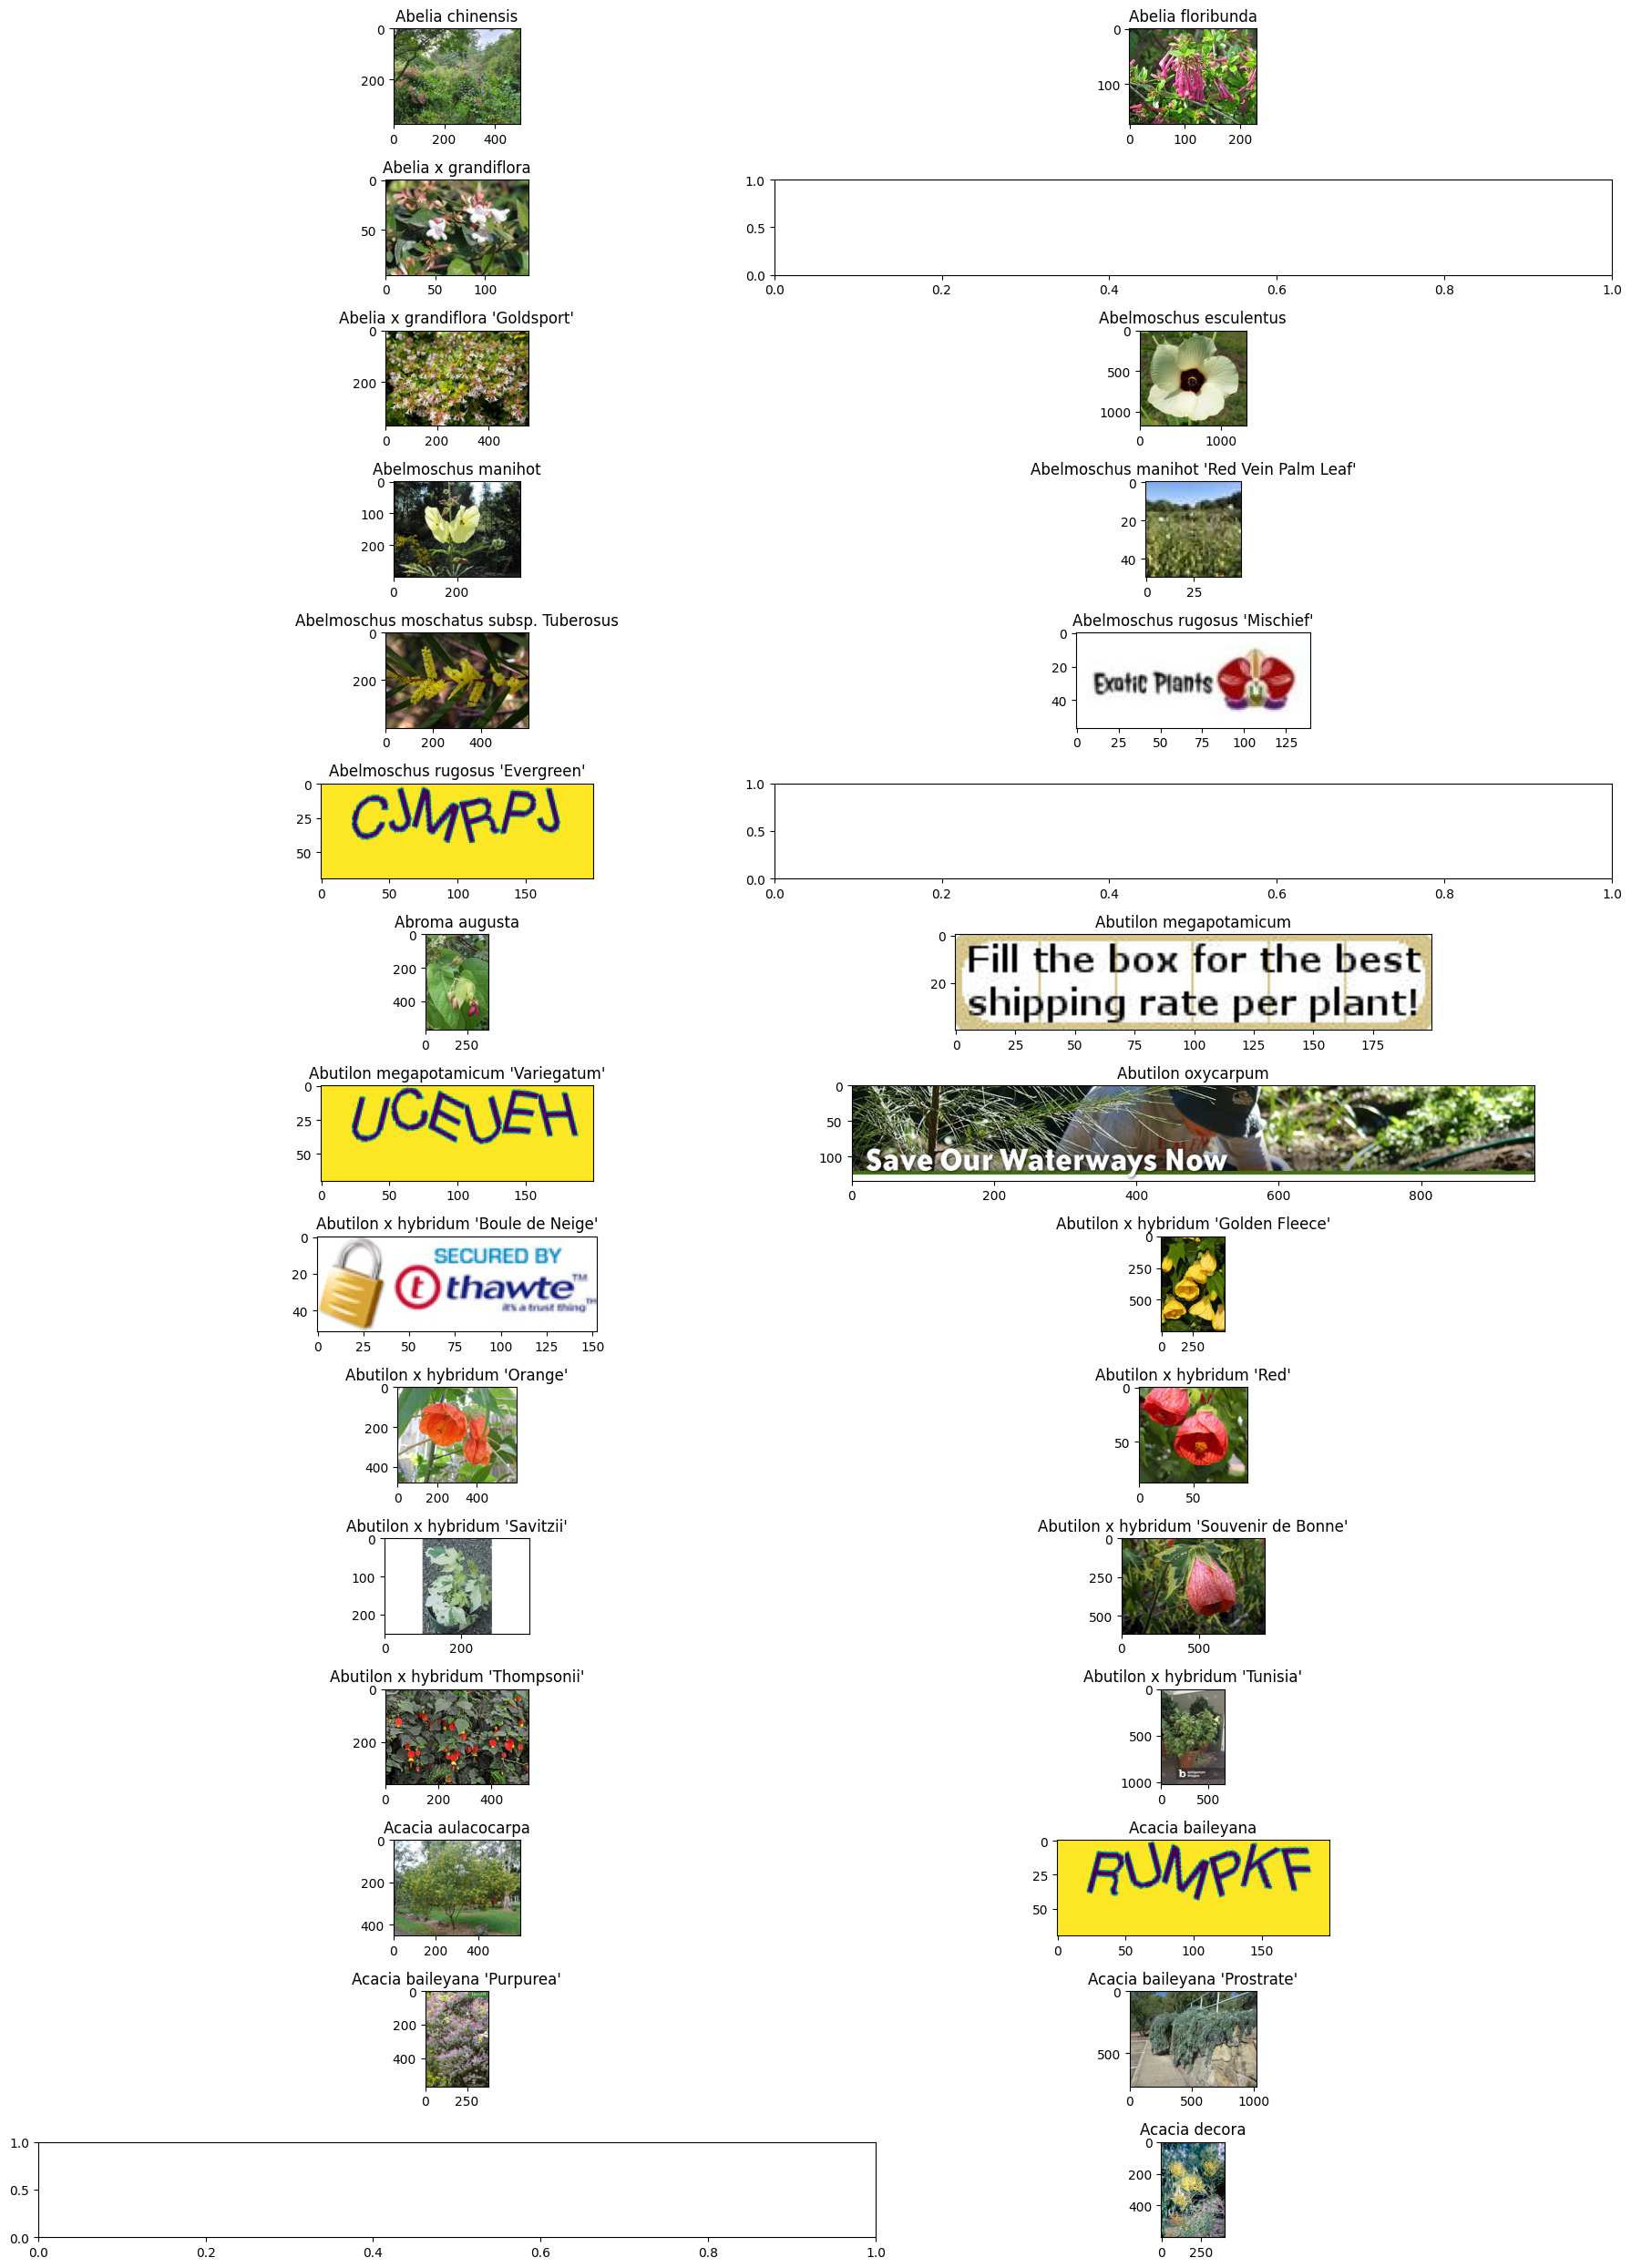

In [168]:
if df_plant_list.shape[0] % 2 == 0:
    n_row = int((df_plant_list.shape[0])/2)
else:
    n_row = int((df_plant_list.shape[0] +1)/2)


fig, axs = plt.subplots(nrows=n_row, ncols=2, figsize= (18,25))

for plant_name, ax in zip(df_plant_list['Plant'].unique(), axs.ravel()):
    src = df_plant_list[df_plant_list['Plant'] == plant_name]['Image_URL'].values[0]
    try:
        img = imread(src)
        ax.imshow(img)
        ax.set(title = plant_name)
    except OSError:
        print(f"cannot format src for {plant_name}")

    

plt.tight_layout()
plt.show()


In [9]:
df[df['Plant ID'] == 1219]

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,...,Image Location,Image Owner,Herb External Have,Herb Images change to,Notes,Why photo removed,Why plant removed,Actioned By,Date Actioned,Status
1209,1219.0,CITVUL,Citrullus lanatus,Watermelon,Citrullus vulgaris,"Annual,Vegetable",2000 to 2500mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active


- check out logic for daily water consumption

In [5]:
from db import get_db
import sqlite3


In [3]:
from datetime import datetime, timedelta
import math

def calculate_water_consumption(sun_exposure, pot_diameter, min_water, max_water):
    if sun_exposure == 'low':
        daily_consumption_mm = min_water / 365
    elif sun_exposure == 'medium':
        daily_consumption_mm = (min_water + max_water) / 2 / 365
    else:  # high sun exposure
        daily_consumption_mm = max_water / 365

    # Area of the pot in square meters
    pot_area = math.pi * (pot_diameter / 100 / 2) ** 2  # converting diameter to meters

    # Daily water consumption in liters
    daily_consumption_l = daily_consumption_mm * pot_area

    return daily_consumption_l

def calculate_next_watering(watered_date, watered_amount, daily_consumption):
    days_to_next_watering = watered_amount / daily_consumption
    next_watering_date = watered_date + timedelta(days=days_to_next_watering)
    return next_watering_date

In [37]:
import os
import pandas as pd
db_path = os.path.join(os.getcwd(), 'instance\\plant_app_db.sqlite')

In [24]:
os.chdir('..')
os.listdir()

['flask_app',
 'instance',
 'poetry.lock',
 'pyproject.toml',
 'README.md',
 'tests']

In [26]:
con = sqlite3.connect(
    db_path
         )

In [27]:
con.execute("SELECT * FROM User").fetchall()

[(1,
  'maxel_test_user',
  'max.holly96@gmail.com',
  'https://www.gravatar.com/avatar/b57f4c4f2e474d6a7de0cc5520379f78?d=identicon&s=128',
  'scrypt:32768:8:1$3olFl86OTBGgK5pw$1c68a9bc3978c559fe515fc8d5ec35c4712d8c465e0c011fedd0a1f29df76eb535eb2a106182b87d74fe1dee090d54ff27fffb87401954ee44cda50ffcced2d4',
  "I'm building this app because I love plants and it keeps looking better and better. Almost as good as my own cutie plants!",
  '2024-06-20 19:04:50.136744+00:00')]

In [75]:
list(results.itertuples(index=False, name=None))

[(1219,
  'Citrullus lanatus',
  'Watermelon',
  'Annual,Vegetable',
  '2000 to 2500mm',
  2000,
  2500,
  'Humid Tropical,Dry Tropical,Humid Subtropical,Dry Subtropical,Temperate',
  'Sun',
  'Loam',
  'High',
  'Insignificant',
  'Mid green',
  'Unknown',
  'Unknown',
  'Yes',
  'Unknown',
  'Unknown',
  'https://www.herbacin.com/wp-content/uploads/2022/02/Bergamotte-Glossar-1024x1024.jpg',
  2,
  1,
  1219,
  25.0,
  'low',
  '2024-06-21',
  15.0,
  1.0,
  '2024-06-19 20:45:13',
  0.09682991055584979,
  Timestamp('2024-07-01 07:51:26.272950')),
 (954,
  'Calathea leopardina',
  'Calathea',
  'Perennial',
  '1400 to 2000mm',
  1400,
  2000,
  'Humid Tropical,Humid Subtropical',
  'Shade',
  'Loam',
  'Low',
  'Insignificant',
  'Light green and dark green',
  'Unknown',
  'Unknown',
  'Unknown',
  'Unknown',
  'Unknown',
  'https://www.plantvine.com/plants/Calathea-Loeseneri-3G-Main-480x600.jpg',
  1,
  1,
  954,
  23.8,
  'low',
  '2024-06-19',
  15.0,
  0.35,
  '2024-06-19 20:02:13

In [77]:
user_id = 1
plants =con.execute("""SELECT p.*,
          up.* 
FROM Plant p 
JOIN UserPlant up ON p.plant_id = up.plant_id 
WHERE up.user_id = ?
ORDER BY up.registered_at DESC""",
(user_id,)).fetchall()
plants

[(1219,
  'Citrullus lanatus',
  'Watermelon',
  'Annual,Vegetable',
  '2000 to 2500mm',
  2000,
  2500,
  'Humid Tropical,Dry Tropical,Humid Subtropical,Dry Subtropical,Temperate',
  'Sun',
  'Loam',
  'High',
  'Insignificant',
  'Mid green',
  'Unknown',
  'Unknown',
  'Yes',
  'Unknown',
  'Unknown',
  'https://www.herbacin.com/wp-content/uploads/2022/02/Bergamotte-Glossar-1024x1024.jpg',
  2,
  1,
  1219,
  25.0,
  'low',
  '2024-06-21',
  15.0,
  1.0,
  '2024-06-19 20:45:13'),
 (954,
  'Calathea leopardina',
  'Calathea',
  'Perennial',
  '1400 to 2000mm',
  1400,
  2000,
  'Humid Tropical,Humid Subtropical',
  'Shade',
  'Loam',
  'Low',
  'Insignificant',
  'Light green and dark green',
  'Unknown',
  'Unknown',
  'Unknown',
  'Unknown',
  'Unknown',
  'https://www.plantvine.com/plants/Calathea-Loeseneri-3G-Main-480x600.jpg',
  1,
  1,
  954,
  23.8,
  'low',
  '2024-06-19',
  15.0,
  0.35,
  '2024-06-19 20:02:13')]

In [91]:

user_id = 2
cursor = con.execute("""SELECT p.*,
          up.* 
FROM Plant p 
JOIN UserPlant up ON p.plant_id = up.plant_id 
WHERE up.user_id = ?
ORDER BY up.registered_at DESC""",
(user_id,))


In [92]:
cols = [description[0] for description in cursor.description]
results= pd.DataFrame.from_records(data = cursor.fetchall(), columns = cols)


In [97]:
def calculate_water_consumption(sun_exposure, pot_diameter, min_water, max_water):
    if sun_exposure == 'low':
        daily_consumption_mm = min_water / 365
    elif sun_exposure == 'medium':
        daily_consumption_mm = (min_water + max_water) / 2 / 365
    else:  # high sun exposure
        daily_consumption_mm = max_water / 365

    # Area of the pot in square meters
    pot_area = math.pi * (pot_diameter / 100 / 2) ** 2  # converting diameter to meters

    # Daily water consumption in liters
    daily_consumption_l = daily_consumption_mm * pot_area

    return daily_consumption_l

In [98]:
daily_water_consumption_plant = []
for index, row in results.iterrows():
    daily_water_consumption_plant.append(
    calculate_water_consumption(sun_exposure=row['sun_exposure'],
                                pot_diameter=row['pot_diameter'],
                                min_water=row['min_water_consumption'],
                                max_water=row['max_water_consumption'])
    )

In [99]:
results['daily_water_consumption'] = daily_water_consumption_plant

In [100]:
daily_water_consumption_plant

[0.2711237495563794, 0.04357345975013241]

In [94]:
def calculate_next_watering(watered_date, watered_amount, daily_consumption):
    days_to_next_watering = watered_amount / daily_consumption
    next_watering_date = pd.to_datetime(watered_date) + timedelta(days=days_to_next_watering)
    return next_watering_date

In [48]:
results['watered_amount']

0    1.00
1    0.35
Name: watered_amount, dtype: float64

In [52]:
pd.to_datetime(results['last_watered'][0])

Timestamp('2024-06-21 00:00:00')

In [101]:
next_watering_date = []
for index, row in results.iterrows():
    next_watering_date.append(
        calculate_next_watering(watered_date=row['last_watered'],
                                watered_amount=row['watered_amount'],
                                daily_consumption=row['daily_water_consumption']
        )
    )

In [102]:
print(next_watering_date[0].date())

2024-06-24


In [103]:
results['next_watering_date'] = next_watering_date

In [65]:
# convert dataframe back to list of tuples
rows_tuples = []
for index, row in results.iterrows():
    rows_tuples.append(row)

In [74]:
list(results.itertuples(index=False, name=None))

[(1219,
  'Citrullus lanatus',
  'Watermelon',
  'Annual,Vegetable',
  '2000 to 2500mm',
  2000,
  2500,
  'Humid Tropical,Dry Tropical,Humid Subtropical,Dry Subtropical,Temperate',
  'Sun',
  'Loam',
  'High',
  'Insignificant',
  'Mid green',
  'Unknown',
  'Unknown',
  'Yes',
  'Unknown',
  'Unknown',
  'https://www.herbacin.com/wp-content/uploads/2022/02/Bergamotte-Glossar-1024x1024.jpg',
  2,
  1,
  1219,
  25.0,
  'low',
  '2024-06-21',
  15.0,
  1.0,
  '2024-06-19 20:45:13',
  0.09682991055584979,
  Timestamp('2024-07-01 07:51:26.272950')),
 (954,
  'Calathea leopardina',
  'Calathea',
  'Perennial',
  '1400 to 2000mm',
  1400,
  2000,
  'Humid Tropical,Humid Subtropical',
  'Shade',
  'Loam',
  'Low',
  'Insignificant',
  'Light green and dark green',
  'Unknown',
  'Unknown',
  'Unknown',
  'Unknown',
  'Unknown',
  'https://www.plantvine.com/plants/Calathea-Loeseneri-3G-Main-480x600.jpg',
  1,
  1,
  954,
  23.8,
  'low',
  '2024-06-19',
  15.0,
  0.35,
  '2024-06-19 20:02:13

In [70]:
list(results.itertuples(index=False))

[Pandas(plant_id=1219, botanical_name='Citrullus lanatus', common_name='Watermelon', plant_type='Annual,Vegetable', water_needs='2000 to 2500mm', min_water_consumption=2000, max_water_consumption=2500, climate_zones='Humid Tropical,Dry Tropical,Humid Subtropical,Dry Subtropical,Temperate', light_needs='Sun', soil_type='Loam', maintenance='High', flower_color='Insignificant', foliage_color='Mid green', perfume='Unknown', aromatic='Unknown', edible='Yes', bore_water_tolerance='Unknown', frost_tolerance='Unknown', image_location='https://www.herbacin.com/wp-content/uploads/2022/02/Bergamotte-Glossar-1024x1024.jpg', user_plant_id=2, user_id=1, _21=1219, size=25.0, sun_exposure='low', last_watered='2024-06-21', pot_diameter=15.0, watered_amount=1.0, registered_at='2024-06-19 20:45:13', daily_water_consumption=0.09682991055584979, next_watering_date=Timestamp('2024-07-01 07:51:26.272950')),
 Pandas(plant_id=954, botanical_name='Calathea leopardina', common_name='Calathea', plant_type='Perenn

In [104]:
results

,plant_id,botanical_name,common_name,plant_type,water_needs,min_water_consumption,max_water_consumption,climate_zones,light_needs,soil_type,...,user_id,plant_id,size,sun_exposure,last_watered,pot_diameter,watered_amount,registered_at,daily_water_consumption,next_watering_date
0,3004,Miscanthus sinensis,Love Grass,Grass,1400 to 2000mm,1400,2000,"Humid Subtropical,Dry Subtropical,Temperate",Sun,Loam,...,2,3004,30.0,low,2024-06-24,30.0,0.2,2024-06-24 19:22:45,0.271124,2024-06-24 17:42:14.733782
1,3048,Musa sapientum 'Kluai Numwa Khom',Dwarf Ducasse Banana,"Fruit,Tree",900 to 1400mm,900,1400,"Humid Tropical,Humid Subtropical,Temperate",Sun,Loam,...,2,3048,15.0,low,2024-06-24,15.0,0.3,2024-06-24 19:14:24,0.043573,2024-06-30 21:14:17.515300


In [133]:
datetime.today().date()


datetime.date(2024, 6, 30)

In [134]:
def check_if_watering_needed(next_watering_date):
    today = datetime.today().date()
    time_to_watering_plant = today - next_watering_date.date()
    if int(time_to_watering_plant / timedelta(days=1)) >= 0:
        return (time_to_watering_plant, True)
    else:
        return (time_to_watering_plant, False)

In [136]:
time_to_watering = []
needs_watering = []
for _, plant in results.iterrows():
    results = check_if_watering_needed(plant['next_watering_date'])
    time_to_watering.append(results[0])
    needs_watering.append(results[1])

In [ ]:
for plant in plants:
        next_watering_date = plant['next_watering_date']
        if next_watering_date:
            next_watering_date = datetime.strptime(next_watering_date, '%Y-%m-%d').date()
            plant['needs_watering'] = next_watering_date <= today
        else:
            plant['needs_watering'] = False